In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
file_list=["./data/merged_data_pos-2019.csv","./data/merged_data_pos-2020.csv",
           "./data/merged_data_pos-2021.csv","./data/merged_data_pos-2022.csv"]
df = combined = pd.concat([pd.read_csv(file)for file in file_list],ignore_index=True)
#df  = pd.read_csv("../data/merged_data_pos-2019.csv")
df.head(3)

FileNotFoundError: [Errno 2] No such file or directory: '../data/merged_data_pos-2019.csv'

In [3]:
old_df = df[['player_name','pts','reb','ast','Salary']]
new_df = df[['player_name','age','player_weight','player_weight','pts','reb','ast',
             'net_rating','oreb_pct','dreb_pct','usg_pct','ts_pct','ast_pct','Salary']]
print(old_df)
print(new_df)

          player_name   pts  reb  ast    Salary
0        Aaron Gordon  14.4  7.7  3.7  19863636
1       Aaron Holiday   9.5  2.4  3.4   2239200
2         Abdel Nader   6.3  1.8  0.7   1618520
3          Al Horford  11.9  6.8  4.0  28000000
4     Al-Farouq Aminu   4.3  4.8  1.2   9258000
...               ...   ...  ...  ...       ...
1826    Yuta Watanabe   5.6  2.4  0.8   1968175
1827     Zach Collins  11.6  6.4  2.9   7350000
1828      Zach LaVine  24.8  4.5  4.2  37096500
1829       Zeke Nnaji   5.2  2.6  0.3   2617800
1830  Ziaire Williams   5.7  2.1  0.9   4591680

[1831 rows x 5 columns]
          player_name  age  player_weight  player_weight   pts  reb  ast  \
0        Aaron Gordon   24      106.59412      106.59412  14.4  7.7  3.7   
1       Aaron Holiday   23       83.91452       83.91452   9.5  2.4  3.4   
2         Abdel Nader   26      102.05820      102.05820   6.3  1.8  0.7   
3          Al Horford   34      108.86208      108.86208  11.9  6.8  4.0   
4     Al-Farouq Ami

In [4]:
old_df.isnull().sum().sort_values(ascending=False)
new_df.isnull().sum().sort_values(ascending=False)

player_name      0
age              0
player_weight    0
player_weight    0
pts              0
reb              0
ast              0
net_rating       0
oreb_pct         0
dreb_pct         0
usg_pct          0
ts_pct           0
ast_pct          0
Salary           0
dtype: int64

In [5]:
x_old = old_df.drop(columns=['Salary','player_name'])
y_old = new_df['Salary']
x_train_old,x_test_old,y_train_old,y_test_old = train_test_split(x_old,y_old,test_size=0.2,random_state=123)
x_new = new_df.drop(columns=['Salary',"player_name"])
y_new = new_df['Salary']
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.2, random_state=123)

In [9]:
# models to train
models = {
    'Linear Regression': LinearRegression(),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5),
    'SVM Regressor': SVR(C=1.0, epsilon=0.2),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42)
}

# the function to train and evaluate models
def evaluate_models(X_train, X_test, y_train, y_test, tag=''):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        results[f'{tag}_{name}'] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2 Score': r2
        }
    return results

results_old = evaluate_models(x_train_old, x_test_old, y_train_old, y_test_old, tag='Three Features')

#combine all results together
all_results_old = {**results_old}
results_df_old = pd.DataFrame(all_results_old).T
print("\nComparison of models without feature enrichment:")
print(results_df_old)

results_new = evaluate_models(x_train_new, x_test_new, y_train_new, y_test_new, tag='All Features')

all_results_new = {**results_new}
results_df_new = pd.DataFrame(all_results_new).T
print("\nComparison of models with feature enrichment")
print(results_df_new)


Comparison of models without feature enrichment:
                                                 MAE          RMSE  R2 Score
Three Features_Linear Regression        4.959101e+06  6.887345e+06  0.569023
Three Features_KNN Regressor            4.637137e+06  7.038563e+06  0.549890
Three Features_SVM Regressor            7.089396e+06  1.169547e+07 -0.242758
Three Features_Random Forest Regressor  4.100074e+06  6.562109e+06  0.608765

Comparison of models with feature enrichment
                                               MAE          RMSE  R2 Score
All Features_Linear Regression        4.660642e+06  6.097851e+06  0.662165
All Features_KNN Regressor            4.111459e+06  5.947605e+06  0.678608
All Features_SVM Regressor            7.089481e+06  1.169553e+07 -0.242771
All Features_Random Forest Regressor  2.652626e+06  4.316311e+06  0.830731


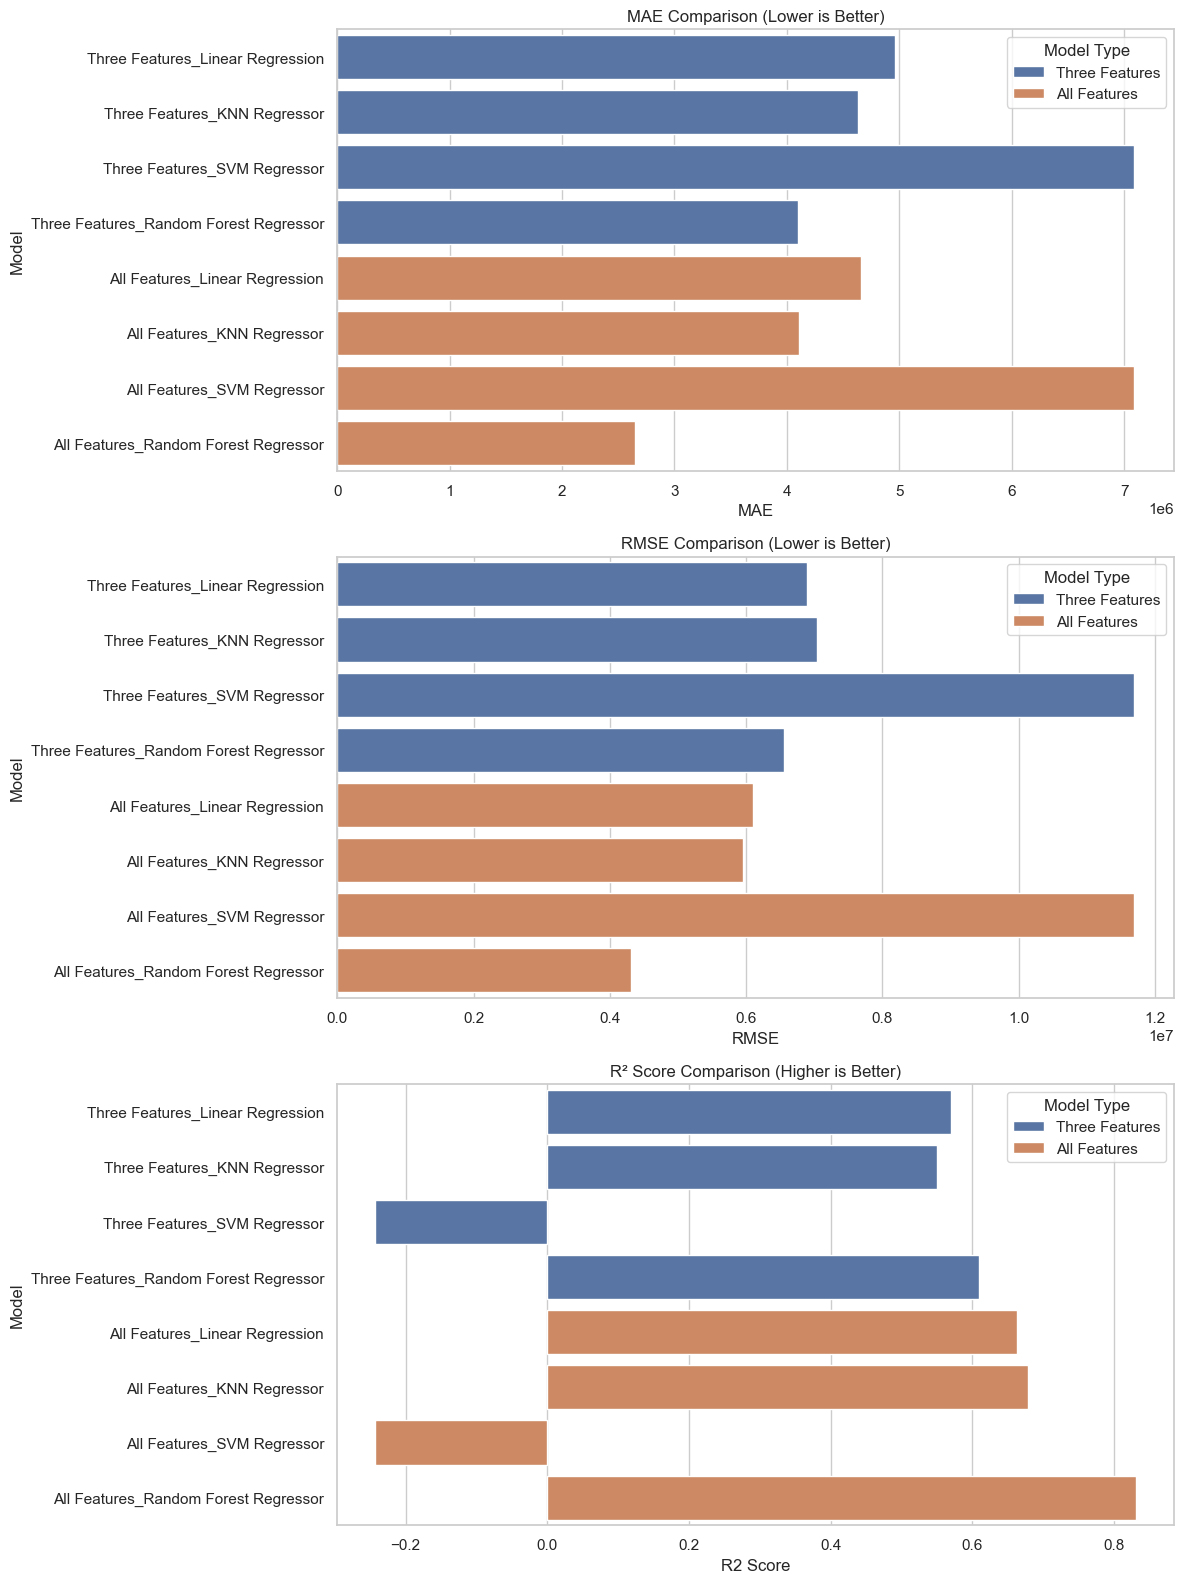

In [10]:
results_df_old["Model Type"] = "Three Features"
results_df_new["Model Type"] = "All Features"

combined_df = pd.concat([results_df_old, results_df_new])
combined_df.reset_index(inplace=True)
combined_df.rename(columns={"index": "Model"}, inplace=True)

sns.set(style="whitegrid")
fig, axes = plt.subplots(3, 1, figsize=(12, 16))

# MAE plot
sns.barplot(data=combined_df, x="MAE", y="Model", hue="Model Type", ax=axes[0])
axes[0].set_title("MAE Comparison (Lower is Better)")

# RMSE plot
sns.barplot(data=combined_df, x="RMSE", y="Model", hue="Model Type", ax=axes[1])
axes[1].set_title("RMSE Comparison (Lower is Better)")

# R² plot
sns.barplot(data=combined_df, x="R2 Score", y="Model", hue="Model Type", ax=axes[2])
axes[2].set_title("R² Score Comparison (Higher is Better)")

plt.tight_layout()
plt.show()